In [84]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA

from package import encoder

In [99]:
csv = pd.read_csv("Halpha.csv", encoding='latin-1')
#csv = encoder.encode_DataFrame(train)
df = pd.DataFrame()

In [100]:
csv.columns

Index(['Field', 'ID', 'RA', 'DEC', 'FWHM', 'ISOarea', 'KRON_RADIUS', 'MU_MAX',
       'nDet_PStotal', 'PhotoFlagDet', 'CLASS_STAR', 'u_PStotal',
       'J0378_PStotal', 'J0395_PStotal', 'J0410_PStotal', 'J0430_PStotal',
       'g_PStotal', 'J0515_PStotal', 'r_PStotal', 'J0660_PStotal', 'i_PStotal',
       'J0861_PStotal', 'z_PStotal', 'e_u_PStotal', 'e_J0378_PStotal',
       'e_J0395_PStotal', 'e_J0410_PStotal', 'e_J0430_PStotal', 'e_g_PStotal',
       'e_J0515_PStotal', 'e_r_PStotal', 'e_J0660_PStotal', 'e_i_PStotal',
       'e_J0861_PStotal', 'e_z_PStotal'],
      dtype='object')

In [101]:
csv

,Field,ID,RA,DEC,FWHM,ISOarea,KRON_RADIUS,MU_MAX,nDet_PStotal,PhotoFlagDet,...,e_J0395_PStotal,e_J0410_PStotal,e_J0430_PStotal,e_g_PStotal,e_J0515_PStotal,e_r_PStotal,e_J0660_PStotal,e_i_PStotal,e_J0861_PStotal,e_z_PStotal
0,b'SPLUS-n14s03 ',b'iDR3.SPLUS-n14s03.023094 ',152.818127,-17.691007,2.162409,525,2.547039,10.630968,12.0,0,...,0.016197,0.013491,0.011681,0.003638,0.006543,0.001912,0.001706,0.001566,0.002259,0.001615
1,b'HYDRA-0077 ',b'iDR3.HYDRA-0077.084865 ',150.383353,-33.043261,2.060758,271,2.745416,12.111699,12.0,0,...,0.007420,0.006743,0.006265,0.003002,0.005050,0.002588,0.002551,0.002657,0.004397,0.003160
2,b'SPLUS-s23s45 ',b'iDR3.SPLUS-s23s45.020422 ',352.251832,-29.779436,2.044366,246,2.879416,11.472648,12.0,0,...,0.006913,0.007903,0.007426,0.003380,0.006805,0.002777,0.002718,0.002879,0.005049,0.003880
3,b'SPLUS-n18s18 ',b'iDR3.SPLUS-n18s18.000089 ',174.850744,-23.627453,2.552651,252,2.627111,10.996559,12.0,0,...,0.045775,0.022941,0.014659,0.004242,0.007772,0.002779,0.002490,0.002253,0.002922,0.001966
4,b'HYDRA-0049 ',b'iDR3.HYDRA-0049.043611 ',149.681164,-29.463707,3.168911,395,3.058134,11.737776,12.0,0,...,0.009739,0.007266,0.006659,0.002987,0.006106,0.002627,0.003007,0.003147,0.003607,0.002895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,b'SPLUS-n03s18 ',b'iDR3.SPLUS-n03s18.004879 ',174.344407,-3.312593,5.641993,15,6.179567,17.176810,12.0,2,...,1.106783,0.489786,0.377637,0.108107,0.332114,0.074605,0.043763,0.142963,0.140397,0.141498
2183,b'STRIPE82-0125',b'iDR3.STRIPE82-0125.029072',327.127535,-0.797904,2.090127,7,1.820000,16.853830,12.0,0,...,0.931720,1.855599,1.005176,0.215671,0.395559,0.109843,0.055459,0.116920,0.180835,0.204769
2184,b'STRIPE82-0132',b'iDR3.STRIPE82-0132.057659',331.015699,1.107458,3.068043,10,5.251886,17.315880,12.0,2,...,0.296826,0.328811,0.276437,0.119231,0.308578,0.085324,0.045233,0.163681,0.149418,0.400926
2185,b'SPLUS-s23s19 ',b'iDR3.SPLUS-s23s19.013644 ',28.196811,-29.890678,6.469779,10,5.489925,17.634684,12.0,0,...,3.865481,1.195566,0.931648,0.150234,0.261225,0.084423,0.058424,0.140621,0.269197,0.304669


# Novo Data Frame

In [102]:
coiso = csv['ID'].map(str) + " - " + csv['RA'].map(str) + " - " + csv['DEC'].map(str)
csv.insert(0, "index", coiso)

In [111]:
csv.set_index = csv['index']

In [112]:
csv

,index,Field,ID,RA,DEC,FWHM,ISOarea,KRON_RADIUS,MU_MAX,nDet_PStotal,...,e_J0395_PStotal,e_J0410_PStotal,e_J0430_PStotal,e_g_PStotal,e_J0515_PStotal,e_r_PStotal,e_J0660_PStotal,e_i_PStotal,e_J0861_PStotal,e_z_PStotal
0,b'iDR3.SPLUS-n14s03.023094 ' - 152.81812746692...,b'SPLUS-n14s03 ',b'iDR3.SPLUS-n14s03.023094 ',152.818127,-17.691007,2.162409,525,2.547039,10.630968,12.0,...,0.016197,0.013491,0.011681,0.003638,0.006543,0.001912,0.001706,0.001566,0.002259,0.001615
1,b'iDR3.HYDRA-0077.084865 ' - 150.38335259819...,b'HYDRA-0077 ',b'iDR3.HYDRA-0077.084865 ',150.383353,-33.043261,2.060758,271,2.745416,12.111699,12.0,...,0.007420,0.006743,0.006265,0.003002,0.005050,0.002588,0.002551,0.002657,0.004397,0.003160
2,b'iDR3.SPLUS-s23s45.020422 ' - 352.25183229093...,b'SPLUS-s23s45 ',b'iDR3.SPLUS-s23s45.020422 ',352.251832,-29.779436,2.044366,246,2.879416,11.472648,12.0,...,0.006913,0.007903,0.007426,0.003380,0.006805,0.002777,0.002718,0.002879,0.005049,0.003880
3,b'iDR3.SPLUS-n18s18.000089 ' - 174.85074360973...,b'SPLUS-n18s18 ',b'iDR3.SPLUS-n18s18.000089 ',174.850744,-23.627453,2.552651,252,2.627111,10.996559,12.0,...,0.045775,0.022941,0.014659,0.004242,0.007772,0.002779,0.002490,0.002253,0.002922,0.001966
4,b'iDR3.HYDRA-0049.043611 ' - 149.68116391940...,b'HYDRA-0049 ',b'iDR3.HYDRA-0049.043611 ',149.681164,-29.463707,3.168911,395,3.058134,11.737776,12.0,...,0.009739,0.007266,0.006659,0.002987,0.006106,0.002627,0.003007,0.003147,0.003607,0.002895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,b'iDR3.SPLUS-n03s18.004879 ' - 174.34440742353...,b'SPLUS-n03s18 ',b'iDR3.SPLUS-n03s18.004879 ',174.344407,-3.312593,5.641993,15,6.179567,17.176810,12.0,...,1.106783,0.489786,0.377637,0.108107,0.332114,0.074605,0.043763,0.142963,0.140397,0.141498
2183,b'iDR3.STRIPE82-0125.029072' - 327.12753519511...,b'STRIPE82-0125',b'iDR3.STRIPE82-0125.029072',327.127535,-0.797904,2.090127,7,1.820000,16.853830,12.0,...,0.931720,1.855599,1.005176,0.215671,0.395559,0.109843,0.055459,0.116920,0.180835,0.204769
2184,b'iDR3.STRIPE82-0132.057659' - 331.01569880774...,b'STRIPE82-0132',b'iDR3.STRIPE82-0132.057659',331.015699,1.107458,3.068043,10,5.251886,17.315880,12.0,...,0.296826,0.328811,0.276437,0.119231,0.308578,0.085324,0.045233,0.163681,0.149418,0.400926
2185,b'iDR3.SPLUS-s23s19.013644 ' - 28.196811241841...,b'SPLUS-s23s19 ',b'iDR3.SPLUS-s23s19.013644 ',28.196811,-29.890678,6.469779,10,5.489925,17.634684,12.0,...,3.865481,1.195566,0.931648,0.150234,0.261225,0.084423,0.058424,0.140621,0.269197,0.304669


In [120]:
# Tratando o data frame
count = 0
c = 0
for column in csv.columns:
    count +=1
    print(f"{count} - {column}")
    # Pegando apenas os 12 filtros de magnitude
    if count >= 13 and count <= 24:
        df[c] = csv[column]
        df.rename(columns = {c:column}, inplace = True)
        c += 1

1 - index
2 - Field
3 - ID
4 - RA
5 - DEC
6 - FWHM
7 - ISOarea
8 - KRON_RADIUS
9 - MU_MAX
10 - nDet_PStotal
11 - PhotoFlagDet
12 - CLASS_STAR
13 - u_PStotal
14 - J0378_PStotal
15 - J0395_PStotal
16 - J0410_PStotal
17 - J0430_PStotal
18 - g_PStotal
19 - J0515_PStotal
20 - r_PStotal
21 - J0660_PStotal
22 - i_PStotal
23 - J0861_PStotal
24 - z_PStotal
25 - e_u_PStotal
26 - e_J0378_PStotal
27 - e_J0395_PStotal
28 - e_J0410_PStotal
29 - e_J0430_PStotal
30 - e_g_PStotal
31 - e_J0515_PStotal
32 - e_r_PStotal
33 - e_J0660_PStotal
34 - e_i_PStotal
35 - e_J0861_PStotal
36 - e_z_PStotal


In [121]:
# Novo Data Frame com apenas os 12 filtros
df

,CLASS_STAR,u_PStotal,J0378_PStotal,J0395_PStotal,J0410_PStotal,J0430_PStotal,g_PStotal,J0515_PStotal,r_PStotal,J0660_PStotal,...,J0395_PStotal,J0410_PStotal,J0430_PStotal,g_PStotal,J0515_PStotal,r_PStotal,J0660_PStotal,i_PStotal,J0861_PStotal,z_PStotal
0,0.985563,16.675000,16.575087,16.565655,16.527618,16.304626,15.712595,15.602545,14.579465,14.041800,...,16.565655,16.527618,16.304626,15.712595,15.602545,14.579465,14.041800,14.135739,13.788973,13.767706
1,0.974406,15.377505,15.103262,15.133448,15.320404,15.284002,15.461737,15.157310,15.294937,14.924424,...,15.133448,15.320404,15.284002,15.461737,15.157310,15.294937,14.924424,15.239864,15.167364,15.103933
2,0.994988,15.014418,15.013782,14.862950,15.409410,15.349426,15.492199,15.614660,15.360847,15.001359,...,14.862950,15.409410,15.349426,15.492199,15.614660,15.360847,15.001359,15.375683,15.355514,15.372553
3,0.972722,19.206873,18.916110,18.565432,17.605415,16.900711,16.123627,16.050580,15.496835,14.925963,...,18.565432,17.605415,16.900711,16.123627,16.050580,15.496835,14.925963,14.985117,14.378416,14.279529
4,0.871400,16.499258,16.071520,15.847940,15.568316,15.472755,15.513618,15.656550,15.418391,14.922369,...,15.847940,15.568316,15.472755,15.513618,15.656550,15.418391,14.922369,15.678785,14.766943,15.023354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,0.564282,21.547806,21.304468,22.342650,21.574844,21.349382,21.170525,21.496216,20.731617,19.896550,...,22.342650,21.574844,21.349382,21.170525,21.496216,20.731617,19.896550,20.808970,20.118773,20.286373
2183,0.549148,21.961760,21.633818,21.945740,22.737680,22.108326,21.432835,21.321358,20.853798,19.913960,...,21.945740,22.737680,22.108326,21.432835,21.321358,20.853798,19.913960,20.692501,20.279907,20.650448
2184,0.609140,21.442451,22.669330,20.962551,21.231575,21.084188,21.397928,21.439405,20.878489,19.952087,...,20.962551,21.231575,21.084188,21.397928,21.439405,20.878489,19.952087,21.123137,20.181057,21.402450
2185,0.653760,21.626970,22.156849,23.343393,22.490442,22.244430,21.534729,21.018692,20.812530,20.167912,...,23.343393,22.490442,22.244430,21.534729,21.018692,20.812530,20.167912,21.030071,20.548590,21.131628


# Teste1 PCA

In [7]:
pca = PCA(4)

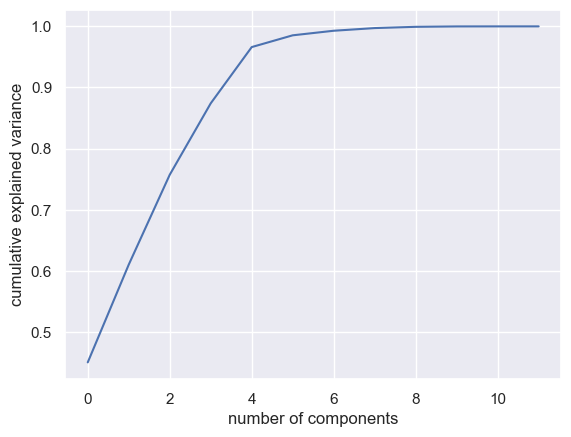

In [8]:
# Identificando quantos componentes serão necenssários
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Verificando, 4 componentes é o necessário para essa base!

In [34]:
df_pca = pca.fit_transform(df)

In [35]:
print(f"Data Frame Shape: {df.shape}")
print(f"PCA Frame Shape: {df_pca.shape}")

Data Frame Shape: (2187, 12)
PCA Frame Shape: (2187, 4)


In [36]:
df_pca

array([[-14.63930162,  -9.00362763,  -4.98865473, -10.06313709],
       [-16.3570335 , -10.12919668,  -5.7323234 , -11.41704721],
       [-16.71814328, -10.33913454,  -5.64264934, -11.24383438],
       ...,
       [ -7.83674839,  -5.74365133,  -1.42794625,  -3.63024051],
       [ -7.83543584,  -3.38216281,  -1.97053983,  -1.97490185],
       [ -9.21906885,  -6.06421908,  -3.36665824,  -3.90647924]])

In [16]:
pca = SparsePCA(4).fit(df)
components = pca.transform(df)

In [17]:
components

array([[-14.63930162,  -9.00362763,  -4.98865473, -10.06313709],
       [-16.3570335 , -10.12919668,  -5.7323234 , -11.41704721],
       [-16.71814328, -10.33913454,  -5.64264934, -11.24383438],
       ...,
       [ -7.83674839,  -5.74365133,  -1.42794625,  -3.63024051],
       [ -7.83543584,  -3.38216281,  -1.97053983,  -1.97490185],
       [ -9.21906885,  -6.06421908,  -3.36665824,  -3.90647924]])

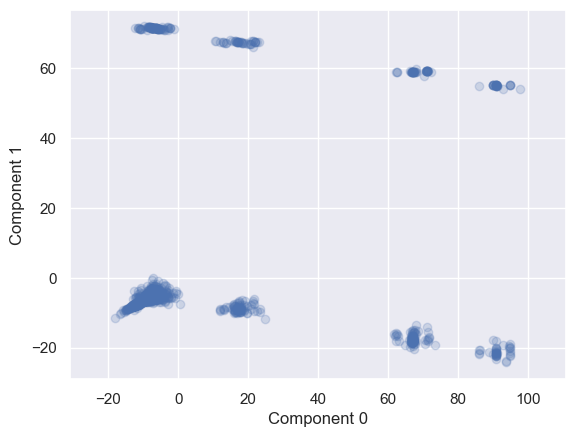

In [18]:
plt.scatter(components[:, 0], components[:, 1], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 1');
plt.axis('equal');

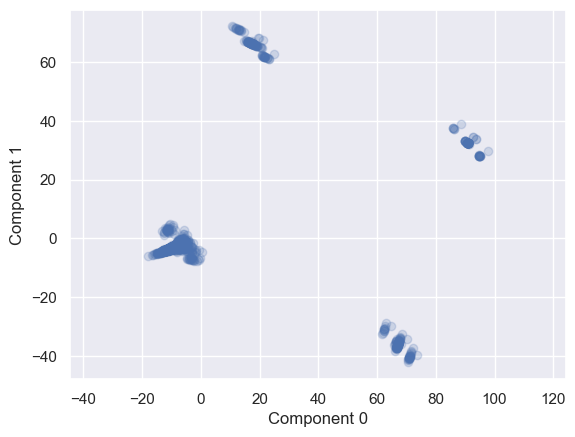

In [19]:
plt.scatter(components[:,0], components[:, 2], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 1');
plt.axis('equal');

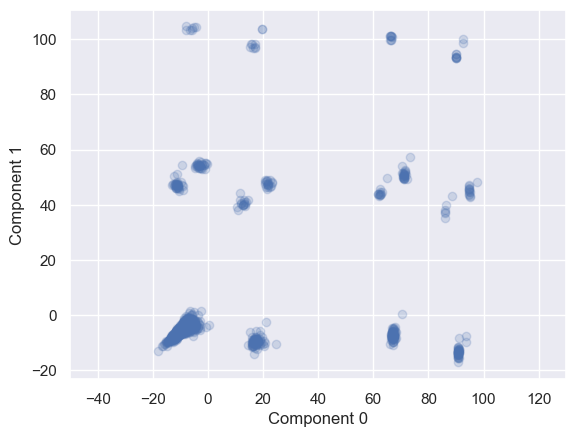

In [20]:
plt.scatter(components[:, 0], components[:, 3], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 1');
plt.axis('equal');

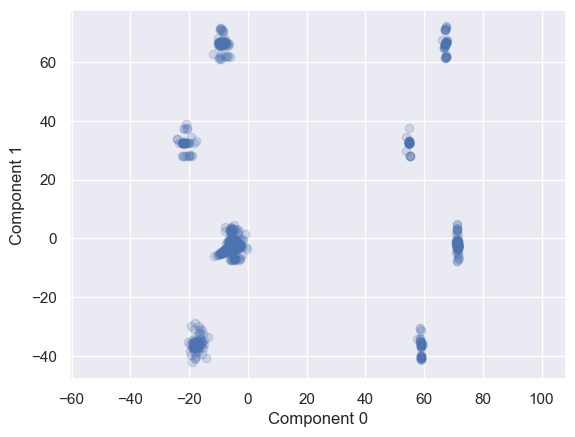

In [21]:
plt.scatter(components[:, 1], components[:, 2], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 1');
plt.axis('equal');

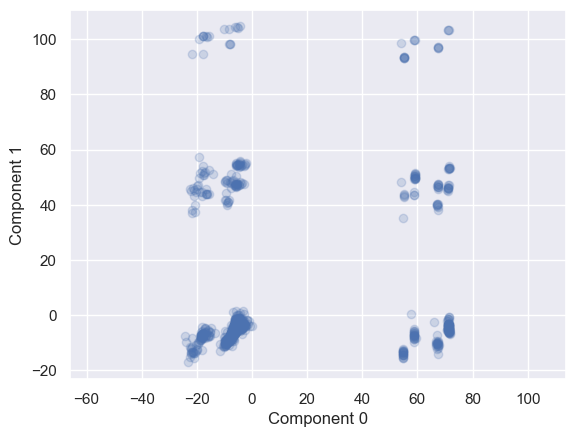

In [22]:
plt.scatter(components[:, 1], components[:, 3], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 1');
plt.axis('equal');

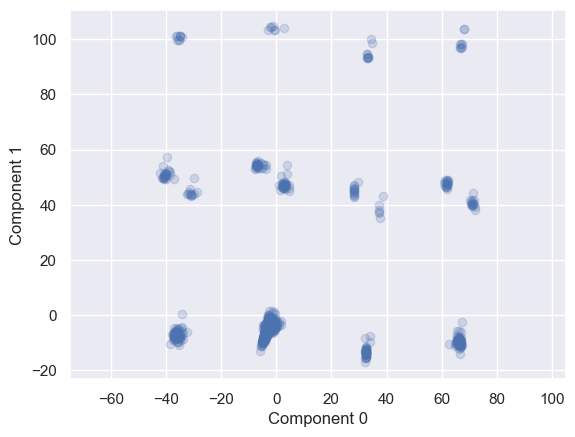

In [23]:
plt.scatter(components[:, 2], components[:, 3], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 1');
plt.axis('equal');

In [30]:
df_pca

array([[-23.03067123,  -0.62700379,  -0.13531323, ...,   3.76462111,
          0.2876494 ,   0.13134093],
       [-25.89632795,  -0.68046044,  -0.2851687 , ...,   3.10730016,
          0.24504243,   0.31153805],
       [-26.1926057 ,  -0.62760666,  -0.08420179, ...,   3.08626409,
          0.25570761,   0.35070262],
       ...,
       [-11.58604175,   0.79630266,   1.25831326, ...,  -1.4973185 ,
          0.21632235,   0.11395863],
       [ -9.74301436,  -0.99801801,   0.45862625, ...,  -1.33896365,
         -0.03353901,   0.1218775 ],
       [-13.69414255,   0.2281751 ,  -0.18413977, ...,  -0.20998282,
          1.21041434,   0.31787705]])

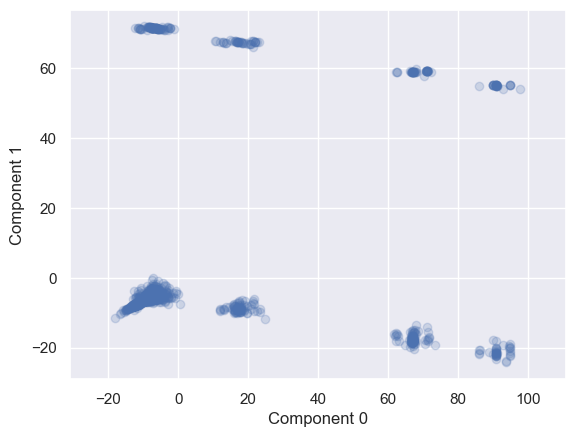

In [37]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 1');
plt.axis('equal');

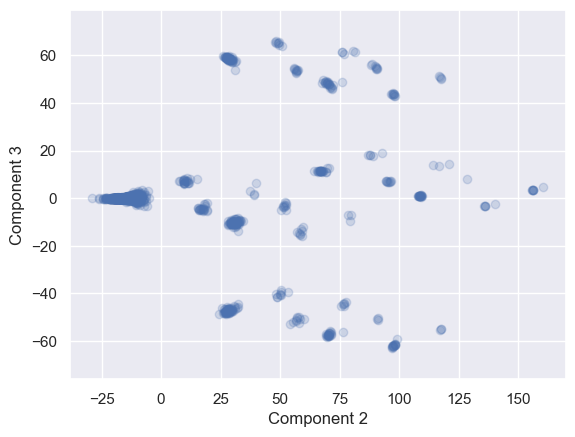

In [25]:
plt.scatter(df_pca[:, 0], df_pca[:, 2], alpha=0.2)
plt.xlabel('Component 2')
plt.ylabel('Component 3');
plt.axis('equal');

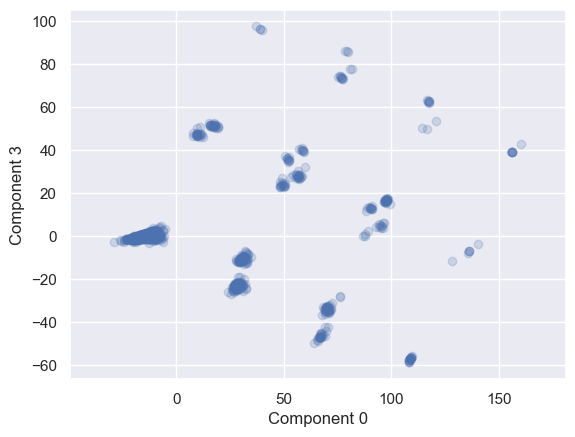

In [33]:
plt.scatter(df_pca[:, 0], df_pca[:, 3], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 3');
plt.axis('equal');

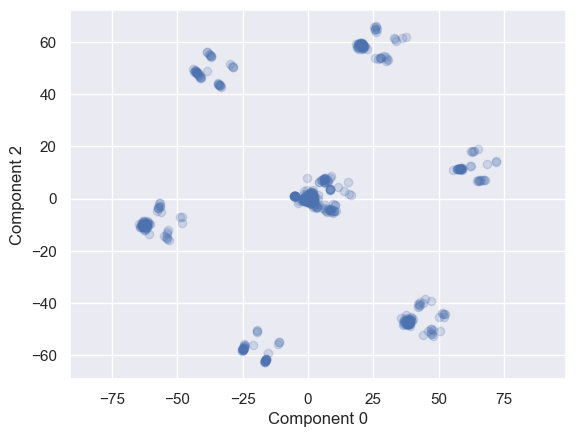

In [27]:
plt.scatter(df_pca[:, 1], df_pca[:, 2], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 2');
plt.axis('equal');

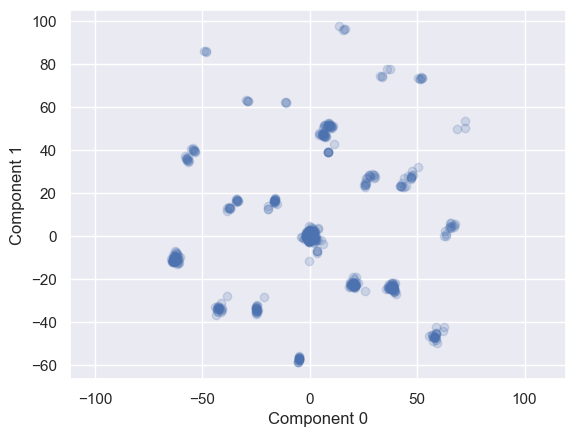

In [28]:
plt.scatter(df_pca[:, 1], df_pca[:, 3], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 1');
plt.axis('equal');

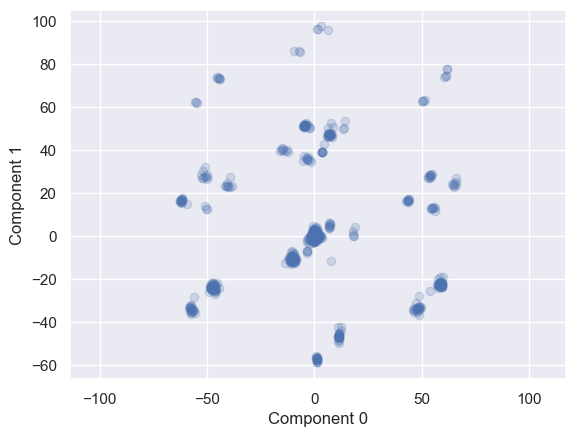

In [29]:
plt.scatter(df_pca[:, 2], df_pca[:, 3], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 1');
plt.axis('equal');

# Teste2 PCA